In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

**QUESTÃO 1**

In [2]:
def spa(lamb=1, mu1=3, mu2=2, c=1, N0=0, Tmax=10**5):

    intervalo = 0 # incrementos de tempo entre transições
    T = [0] # lista de tempos dos eventos
    N = [N0] # lista de estados
    qtd_pessoas = 0
    vetor_qtd = [0]
    fila_espera = []

    while T[-1] < Tmax:
        # (0,0)
        if(N[-1] == 0):
            intervalo = np.random.exponential(1/lamb)
            N.append(1)
            qtd_pessoas += 1
        # (1, 0)    
        elif(N[-1] == 1):
            intervalo = np.random.exponential(1/mu1)
            N.append(2)
        # (0, 1)
        elif(N[-1] == 2):
            intervalo = np.random.exponential(1/(mu2+lamb))
            if(np.random.random() < (lamb/(mu2+lamb))) :
                N.append(3)
                qtd_pessoas += 1
            else:
                N.append(0)
                qtd_pessoas -= 1
        # (1,1)
        elif(N[-1] == 3):
            intervalo = np.random.exponential(1/(mu2+mu1))
            if(np.random.random() < (mu1/(mu2+mu1))) :
                N.append(4)
            else:
                N.append(1)
                qtd_pessoas -= 1
        # (w,1)
        elif(N[-1] == 4):
            intervalo = np.random.exponential(1/mu2)
            N.append(2)
            qtd_pessoas -= 1

        vetor_qtd.append(qtd_pessoas)
        T.append(T[-1] + intervalo)

    return T, vetor_qtd

In [3]:
# (1) (A)

def n_medio_pessoas(lamb, mu1=1, mu2=1, c=1, N0=0, Tmax=10**5):
    ls = [i for i in range(1, lamb+1)]
    fls = []

    for l in ls:
        fl = spa(l, mu1, mu2, c, N0, Tmax)[1]
        fls.append(sum(fl) / len(fl))

    return ls, fls

xs, ys = n_medio_pessoas(15)

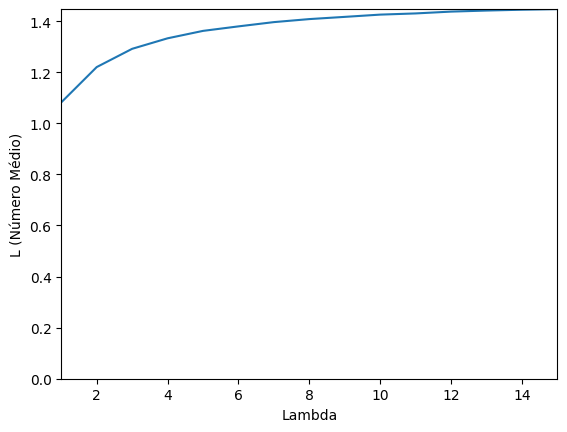

In [4]:
fig, ax = plt.subplots()
ax.plot(xs, ys)
plt.ylabel("L (Número Médio)")
plt.xlabel("Lambda")
ax.set(xlim=(min(xs), max(xs)), ylim=(0, max(ys)))
plt.show()

In [5]:
# (1) (B)

# ****Fiz junto com o Pellegrini no Lab, por isso só copiei!!!****

# função para simulação do ex. do Spa COM FILA DE ESPERA
def simula_spa_espera(lamb, mu1, mu2, c=1, n0=0, e=5, Tmax=10**5):

    intervalo = 0             # incrementos de tempo entre transições
    T = [0]                   # lista de tempos dos eventos
    N = [n0]                  # lista de estados 
    qtd_pessoas = 0           # quantidade de pessoas no sistema
    vetor_pessoas = []        # Vetor de pessoas no sistema
    qtd_pessoas_espera = 0    # Quantidade de pessoas na fila de espera
    qtd_pessoas_atendidas = 0 # Quantidade de pessoas atendidas (mu2)

    while T[-1] < Tmax:
        # Estados (0, _) são independentes da fila de espera
        # uma vez que chegadas vão direto para o sistema.
        # --------------------------------------------------
        #(0, 0)
        if(N[-1] == 0):
            intervalo = np.random.exponential(1/lamb)
            qtd_pessoas += 1
            N.append(1)
            
        #(1, 0) - Se chega vai pra fila de espera
        elif(N[-1] == 1):
            intervalo = np.random.exponential(1/(mu1+lamb))
            # Se saída:
            if np.random.random() < mu1/(mu1+lamb):
                # Se fila_espera vazia -> 0,1
                if qtd_pessoas_espera == 0:
                    N.append(2)
                # Senão -> 1,1
                else:
                    qtd_pessoas_espera -= 1
                    qtd_pessoas += 1
                    N.append(3)
            # Se chegada:
            else:
                if qtd_pessoas_espera < e: qtd_pessoas_espera += 1
            
        #(0, 1)
        elif(N[-1] == 2):
            intervalo = np.random.exponential(1/(mu2+lamb))
            # Se chegada:
            if(np.random.random() < (lamb/(mu2+lamb))):
                N.append(3)
                qtd_pessoas += 1
            # Se saída:
            else:
                N.append(0)
                qtd_pessoas -= 1
                qtd_pessoas_atendidas += 1
                
        #(1, 1) - Se chega vai pra fila de espera
        elif(N[-1] == 3):
            intervalo = np.random.exponential(1/(mu2+mu1+lamb))
            # Se chegada:
            if np.random.random() < lamb/(mu1+lamb):
                if qtd_pessoas_espera < e: qtd_pessoas_espera += 1
            # Senão, se saída mu1:
            elif(np.random.random() < (mu1/(mu2+mu1))):
                N.append(4)
            # Senão (se saída mu2):
            else:
                N.append(1)
                qtd_pessoas -= 1
                qtd_pessoas_atendidas += 1
                
        #(w, 1) - Se chega vai pra fila de espera
        elif(N[-1] == 4):
            intervalo = np.random.exponential(1/(mu2+lamb))
            # Se saída:
            if np.random.random() < mu2/(mu2+lamb):
                N.append(2)
                qtd_pessoas -= 1
                qtd_pessoas_atendidas += 1
            # Se entrada:
            else:
                if qtd_pessoas_espera < e: qtd_pessoas_espera += 1

        T.append(T[-1] + intervalo)
        vetor_pessoas.append(qtd_pessoas+qtd_pessoas_espera)
        
    return vetor_pessoas, T[-1], qtd_pessoas_atendidas

In [6]:
EXECUCOES = 10**5
lista_limite_fila = [l for l in range(2, 31, 4)]
lista_L_medio = []
lista_W_medio = []

for limite in lista_limite_fila:
    pessoas, tempo, qtd_atendida = simula_spa_espera(
                                    lamb = 0.8, mu1 = 3, 
                                    mu2  = 2  , c   = 1, 
                                    n0   = 0  , e   = limite,
                                    Tmax = EXECUCOES)
    
    media_L = sum(pessoas)/ len(pessoas)
    media_W = (tempo*media_L) / qtd_atendida
    
    lista_L_medio.append(media_L)
    lista_W_medio.append(media_W)

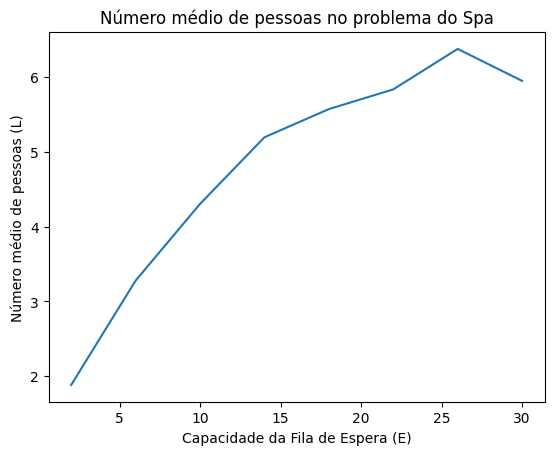

In [7]:
fig,ax = plt.subplots()
ax.plot(lista_limite_fila, lista_L_medio)
#ax.set_xticks(experimentos)
#ax.set_yticks(vetor_passos)
#plt.xticks(rotation = 45)
plt.xlabel(f'Capacidade da Fila de Espera (E)')
plt.ylabel('Número médio de pessoas (L)')
plt.title('Número médio de pessoas no problema do Spa')
plt.show()

**QUESTÃO 2**

In [2]:
def banco(lamb=1, mu=1.2, P=0, Tmax=10**2):
    
    # na fila (tempos de entrada)
    normais = []
    prefs = []
    
    # tempo de espera (tipo, entrada, saida)
    diffs = []
    
    T = [0] # lista de tempos dos eventos
    
    while T[-1] < Tmax:
        # fila vazia
        if len(normais) + len(prefs) == 0:
            intervalo = np.random.exponential(1/lamb)
            if np.random.random() < P:
                prefs.append(T[-1] + intervalo)
            else:
                normais.append(T[-1] + intervalo)
                
        # fila não-vazia
        else:
            intervalo = np.random.exponential(1/(lamb+mu))
            # chegada de mais um
            if(np.random.random() < (lamb/(lamb+mu))):
                if np.random.random() < P:
                    prefs.append(T[-1] + intervalo)
                else:
                    normais.append(T[-1] + intervalo)
            # saida de mais um
            else:
                if len(prefs) != 0:
                    entrada_pref = prefs.pop(0)
                    diffs.append(('p', entrada_pref, T[-1] + intervalo))
                else:
                    entrada_normal = normais.pop(0)
                    diffs.append(('n', entrada_normal, T[-1] + intervalo))
                    
        T.append(T[-1] + intervalo)
        
    return T, diffs

def W_tempo_espera(lamb=1, mu=1.2, P=0, Tmax=10**2):
    _, diffs = banco(lamb=1, mu=1.2, P=0, Tmax=Tmax)
    
    return mean(list(map(lambda vs: abs(vs[2]-vs[1]), diffs)))

In [3]:
# (2) (A)

def valores_plot(ps, lamb=1, mu=1.2, Tmax=10**2, N=10**3):
    vs = ([],[])
    
    for p in ps:
        media = mean([W_tempo_espera(lamb, mu, p, Tmax) for i in range(N)])
        vs[0].append(p)
        vs[1].append(media)
        
    return vs[0], vs[1]


ps=np.around(np.linspace(0, 1, 11).astype(float), 2).tolist()

xs, ys = valores_plot(ps=ps)

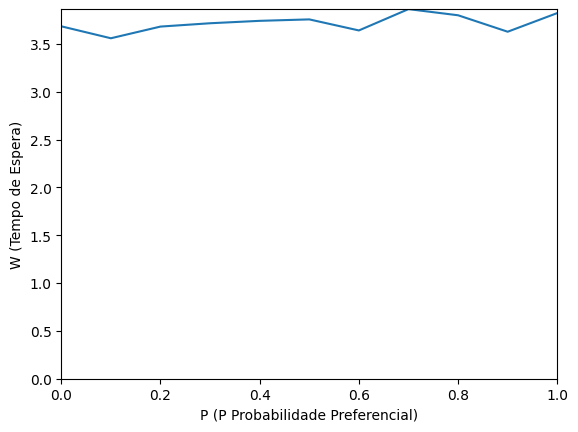

In [4]:
fig, ax = plt.subplots()
ax.plot(xs, ys)
plt.xlabel("P (P Probabilidade Preferencial)")
plt.ylabel("W (Tempo de Espera)")
ax.set(xlim=(min(xs), max(xs)), ylim=(0, max(ys)))
plt.show()

Ter preferencial não muda o tempo W (provavelmente pessoas não-preferenciais terão um tempo de espera maior).

In [5]:
# (2) (B)

def valores_boxplot(p, lamb=1, mu=1.2, Tmax=10**3):
    _, diffs = banco(lamb=1, mu=1.2, P=0, Tmax=Tmax)
    
    
    return list(map(lambda v: abs(v[2] - v[1]), diffs))

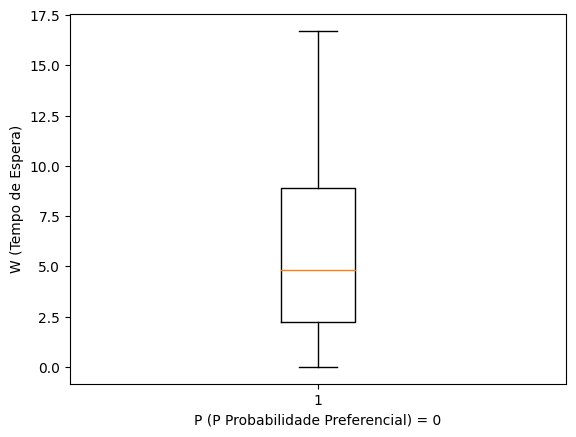

In [12]:
p = 0
fig, ax = plt.subplots()
ax.boxplot(valores_boxplot(p=p))
plt.xlabel(f"P (P Probabilidade Preferencial) = {p}")
plt.ylabel("W (Tempo de Espera)")
plt.show()

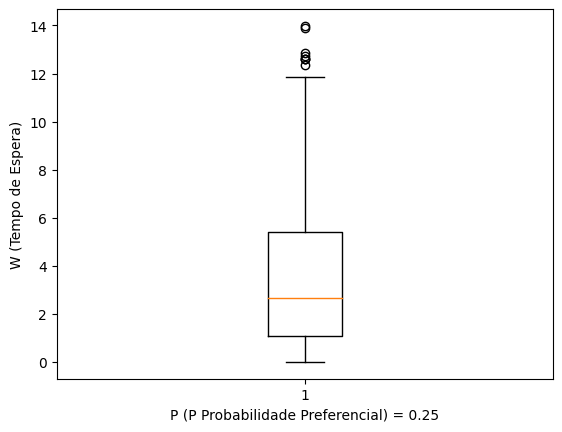

In [170]:
p = 0.25
fig, ax = plt.subplots()
ax.boxplot(valores_boxplot(p=p))
plt.xlabel(f"P (P Probabilidade Preferencial) = {p}")
plt.ylabel("W (Tempo de Espera)")
plt.show()

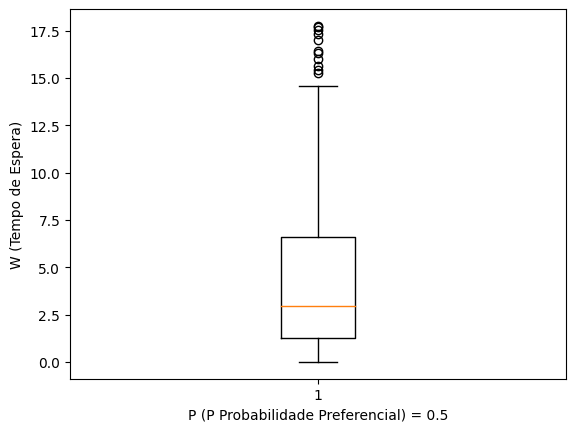

In [16]:
p = 0.5
fig, ax = plt.subplots()
ax.boxplot(valores_boxplot(p=p))
plt.xlabel(f"P (P Probabilidade Preferencial) = {p}")
plt.ylabel("W (Tempo de Espera)")
plt.show()

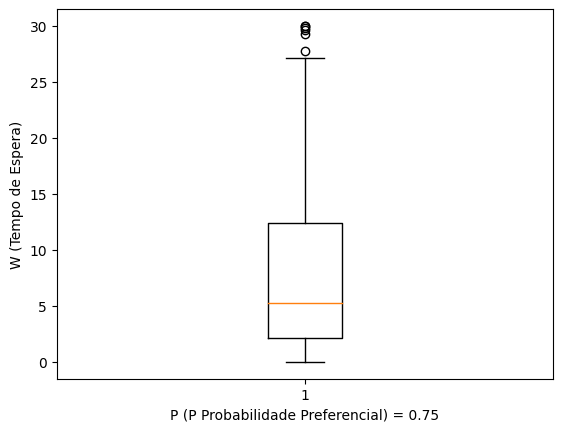

In [17]:
p = 0.75
fig, ax = plt.subplots()
ax.boxplot(valores_boxplot(p=p))
plt.xlabel(f"P (P Probabilidade Preferencial) = {p}")
plt.ylabel("W (Tempo de Espera)")
plt.show()

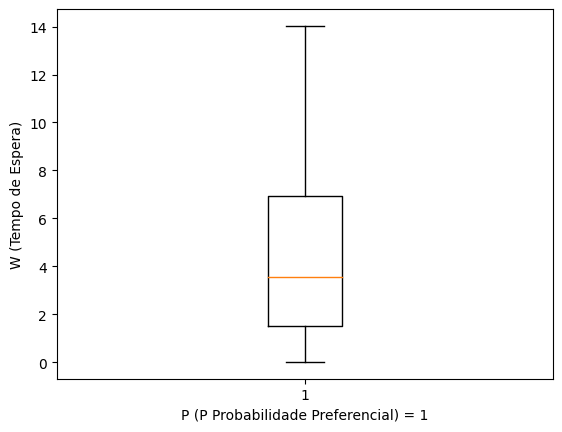

In [14]:
p = 1
fig, ax = plt.subplots()
ax.boxplot(valores_boxplot(p=p))
plt.xlabel(f"P (P Probabilidade Preferencial) = {p}")
plt.ylabel("W (Tempo de Espera)")
plt.show()

Interessante pensar que a média de espera não muda _drasticamente_ em relação à probabilidade do preferencial P, porém a distribuição da espera com certeza muda. O interessante é ver que quando P=0.5, por exemplo, existem outliers, que não existiam no P=0. Nesse exemplo, é óbvio que se, de cada 2 pessoas, em média, 1 é preferencial, essas que não são preferenciais serão afetadas (pois os preferenciais sempre passarão na frente delas), aumentando o intervalo de espera (e, portanto, tornando-os outliers). Veja que, em geral, aproximando-se de P=0.5 (coloquei só P=0.25 e P=0.75, e ainda com poucos valores de Tmax, então não estabilizou tanto a distribuição), os outliers só crescem (a proporção entre preferenciais e não-preferenciais torna-se próxima à 1).

**QUESTÃO 3**

In [5]:
# (3)
import random
def duas_mm1(lamb=1, mu=1.2, Tmax=10**2):
    # na fila (tempos de entrada)
    fila1 = []
    fila2 = []
    
    # tempo de espera (fila, tempo_entrada, intervalo_servico, tempo_saida)
    diffs = []
    
    T1 = [0] # lista de tempos dos eventos da fila1
    T2 = [0] # lista de tempos dos eventos da fila2
    
    l1 = lamb
    l2 = lamb
    m1 = mu
    m2 = mu
    
    while T1[-1] < Tmax or T2[-1] < Tmax:
        
        # isso pra escolher qual evento aconteceu ponderado (l1, l2, m1, m2)
        
        escolhas = ['l1', 'm1', 'l2', 'm2']
        pesos = np.array([l1, l2, (len(fila1) != 0) * m1, (len(fila2) != 0) * m2])
        pesos = list(pesos / np.sum(pesos))
        escolha = random.choices(escolhas, pesos)[0]
        
        # -----------------------------------------------------------------
        
        # chegou alguem na fila1
        if escolha == 'l1':
            T = T1
            tempo_chegada = np.random.exponential(1/l1)
            tempo_atual = T[-1] + tempo_chegada
            
            fila1.append(tempo_atual)
            T1.append(tempo_atual)
        
        # chegou alguem na fila2
        elif escolha == 'l2':
            T = T2
            tempo_chegada = np.random.exponential(1/l2)
            tempo_atual = T[-1] + tempo_chegada
            
            fila2.append(tempo_atual)
            T2.append(tempo_atual)
            
        # saiu (atendido) alguem da fila1    
        elif escolha == 'm1':
            T = T1
            
            if len(fila1) != 0:
                tempo_atendimento = np.random.exponential(1/m1)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = fila1.pop(0)
                diffs.append(('f1', entrada, tempo_atendimento, tempo_atual))
            
            # fila vazia (acontece nada) (isso é "erro" de arredondamento de float)
            else:
                tempo_atual = T[-1]
            
        
        # escolha == 'm2'
        # saiu (atendido) alguem da fila2
        else:
            T = T2
            
            if len(fila2) != 0:
                tempo_atendimento = np.random.exponential(1/m2)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = fila2.pop(0)
                diffs.append(('f2', entrada, tempo_atendimento, tempo_atual))
            
            # fila vazia (acontece nada) (isso é "erro" de arredondamento de float)
            else:
                tempo_atual = T[-1]
            
        if T[-1] != tempo_atual:
            T.append(tempo_atual)
        
    return T1, T2, diffs
            

In [6]:
Tmax = 10**4
T1, T2, diffs = duas_mm1(Tmax = Tmax)
diffs

[('f2', 3.3156404760698734, 0.49301365545029724, 3.8086541315201705),
 ('f1', 0.8110451675052137, 0.12116160515204075, 0.9322067726572545),
 ('f2', 3.8797661771881895, 1.2451434544929099, 5.124909631681099),
 ('f1', 2.520765556650089, 0.29964290664175536, 3.2647239107627506),
 ('f1', 2.965081004120995, 0.4546025316201313, 6.502559200100129),
 ('f2', 7.110252786245413, 0.01572895025056462, 7.125981736495977),
 ('f2', 7.187796238139874, 0.2184840686521438, 7.406280306792017),
 ('f2', 8.684121843456975, 0.9987416053302793, 9.682863448787254),
 ('f1', 5.766789184516368, 0.9141541484698492, 10.728454619621617),
 ('f1', 6.047956668479998, 1.3565896384155565, 15.364658397495628),
 ('f1', 6.822306305793486, 0.6173359454266497, 15.981994342922277),
 ('f1', 9.814300471151768, 1.2466195028612401, 17.228613845783517),
 ('f1', 10.918768006554163, 0.20441112810897857, 17.433024973892497),
 ('f1', 14.008068759080071, 0.9950117242194544, 19.998902778936678),
 ('f1', 19.003891054717222, 0.0120551063611

In [109]:
# Quantidade em segundos que o atendente 1 fica ocioso

ocioso_at1 = list(filter(lambda e: e[0] == 'f1', diffs))
ocioso_at1 = list(map(lambda e: e[2], ocioso_at1)) # tempo que atendente 1 ficou ocupado atendendo
ocioso_at1 = sum(ocioso_at1)
print(f"Atendente 1 ficou {Tmax - ocioso_at1} segundos ocioso!")

Atendente 1 ficou 5448.6568587804495 segundos ocioso


In [110]:
# Quantidade em segundos que o atendente 2 fica ocioso

ocioso_at2 = list(filter(lambda e: e[0] == 'f2', diffs))
ocioso_at2 = list(map(lambda e: e[2], ocioso_at2)) # tempo que atendente 2 ficou ocupado atendendo
ocioso_at2 = sum(ocioso_at2)
print(f"Atendente 2 ficou {Tmax - ocioso_at2} segundos ocioso!")

Atendente 2 ficou 4594.480047174438 segundos ocioso!


In [111]:
# (3)

def mm2(lamb=1, mu=1.2, Tmax=10**2):
    # na fila (tempos de entrada)
    fila = []
    
    # tempo de espera (atendente, tempo_entrada, intervalo_servico, tempo_saida)
    diffs = []
    
    T = [0] # lista de tempos da entrada da fila
    
    l = lamb
    m1 = mu
    m2 = mu
    
    while T[-1] < Tmax:
        
        # isso pra escolher qual evento aconteceu ponderado (l, m1, m2)
        
        escolhas = ['l', 'm1', 'm2']
        pesos = np.array([l, (len(fila) != 0) * m1, (len(fila) != 0) * m2])
        pesos = list(pesos / np.sum(pesos))
        escolha = random.choices(escolhas, pesos)[0]
        
        # -----------------------------------------------------------------
        
        # chegou alguem na fila
        if escolha == 'l':
            tempo_chegada = np.random.exponential(1/l)
            tempo_atual = T[-1] + tempo_chegada
            
            fila.append(tempo_atual)
            T.append(tempo_atual)
        
            
        # saiu (atendido) alguem da fila pelo atentende 1  
        elif escolha == 'm1':
            
            if len(fila) != 0:
                tempo_atendimento = np.random.exponential(1/m1)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = fila.pop(0)
                diffs.append(('a1', entrada, tempo_atendimento, tempo_atual))
            
            # fila vazia (acontece nada) (isso é "erro" de arredondamento de float)
            else:
                tempo_atual = T[-1]
            
        
        # escolha == 'm2'
        # saiu (atendido) alguem da fila pelo atentende 2
        else:
            
            if len(fila) != 0:
                tempo_atendimento = np.random.exponential(1/m2)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = fila.pop(0)
                diffs.append(('a2', entrada, tempo_atendimento, tempo_atual))
            
            # fila vazia (acontece nada) (isso é "erro" de arredondamento de float)
            else:
                tempo_atual = T[-1]
            
        if T[-1] != tempo_atual:
            T.append(tempo_atual)
        
    return T, diffs
            

In [115]:
Tmax = 10**4
T1, diffs = mm2(Tmax = Tmax)
diffs

[('a2', 1.5573112955475945, 1.2734277392230258, 2.9272580650972166),
 ('a1', 1.653830325874191, 0.15844170728295834, 3.085699772380175),
 ('a1', 3.790015170362942, 0.26763223329127506, 4.057647403654217),
 ('a2', 4.46488895478898, 0.10483981939125828, 6.588270208921197),
 ('a2', 5.537122726294788, 0.8405092477570425, 7.42877945667824),
 ('a1', 6.235345112231662, 0.6262796834059879, 8.055059140084227),
 ('a2', 6.483430389529939, 0.029965943844688002, 8.085025083928915),
 ('a2', 8.458419520654948, 0.6906540838581133, 9.149073604513061),
 ('a1', 9.623907985664514, 0.9832042011444005, 10.607112186808916),
 ('a2', 10.864457834216667, 0.30965900086058396, 11.174116835077252),
 ('a1', 11.951136379253837, 0.09996947635229313, 12.05110585560613),
 ('a1', 12.850893114807427, 0.7694899929576259, 13.620383107765052),
 ('a1', 14.563263983381892, 0.5265998823908722, 15.548041394317742),
 ('a2', 15.02144151192687, 0.6326349215942683, 16.18067631591201),
 ('a2', 18.027069033951964, 0.2824800362959955,

In [118]:
# Quantidade em segundos que o atendente 1 fica ocioso

ocioso_at1 = list(filter(lambda e: e[0] == 'a1', diffs))
ocioso_at1 = list(map(lambda e: e[2], ocioso_at1))
ocioso_at1 = sum(ocioso_at1)
print(f"Atendente 1 ficou {Tmax - ocioso_at1} segundos ocioso!")

Atendente 1 ficou 7687.984756190153 segundos ocioso!


In [119]:
# Quantidade em segundos que o atendente 2 fica ocioso

ocioso_at2 = list(filter(lambda e: e[0] == 'a2', diffs))
ocioso_at2 = list(map(lambda e: e[2], ocioso_at2))
ocioso_at2 = sum(ocioso_at2)
print(f"Atendente 2 ficou {Tmax - ocioso_at2} segundos ocioso!")

Atendente 2 ficou 7733.420088977589 segundos ocioso!


**QUESTÃO 4**

In [154]:
def avenidas(l1=10, l2=14, mA=15, mB=30, mC=24, mD=20, mE=6, Tmax=10**2):
    fA = []
    fB = []
    fC = []
    fD = []
    fE = []
    T = [0]
    
    lA = l1
    lB = 0.25 * mA + 0.7 * mC + 0.3 * mD
    lC = 0.75 * mA + l2
    lD = mB
    lE = 0.3 * mC
    
    infos = []
    
    while T[-1] < Tmax:
        
        # essa parte aqui é pra ver qual evento aconteceu (lA, lB, ..., mD, mE)
        # caso alguma fila dessas está vazia, é impossível acontecer seu respectivo
        # atendimento (exemplo, se fA está vazia, não dá pra acontecer mA), então
        # seu valor de saída (mA, por exemplo), não afeta a escolha (exemplo, se
        # fA vazia, (len(fA) != 0) * mA é zero --- por ser float, pode ter erro resi-
        # dual, que é verificado em cada caso com exemplo len(fA) != 0)
        
        escolhas = ['lA', 'mA', 'lB', 'mB', 'lC', 'mC', 'lD', 'mD', 'lE', 'mE']
        pesos = np.array([lA, lB, lC, lD, lE, (len(fA) != 0) * mA, (len(fB) != 0) * mB,
                          (len(fC) != 0) * mC, (len(fD) != 0) * mD, (len(fE) != 0) * mE])
        pesos = list(pesos / np.sum(pesos))
        escolha = random.choices(escolhas, pesos)[0]
        
        if escolha == 'lA':
            tempo_chegada = np.random.exponential(1/lA)
            tempo_atual = T[-1] + tempo_chegada            
            fA.append(tempo_atual)
            infos.append(('lA', 0, 0, tempo_atual))
      
    
        elif escolha == 'mA':
            if len(fA) != 0:
                tempo_atendimento = np.random.exponential(1/mA)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = fA.pop(0)
                infos.append(('mA', entrada, tempo_atendimento, tempo_atual))
                
                # escolhe qual nova fila ele vai entrar
                nova_fila = random.choices([fB, fC], [0.25, 0.75])[0]
                nova_fila.append(tempo_atual)
                
                if nova_fila == fB: 
                    infos.append(('lB', 0, 0, tempo_atual))
                else:
                    infos.append(('lC', 0, 0, tempo_atual))
            
            # nada aconteceu nesse intervalo, pois fA vazia
            else:
                tempo_atual = T[-1]
        
        
        # nada aconteceu nesse intervalo, pois entra em fB direto quando escolha == 'mA' (0.25)
        # modelei dessa forma pra o carro sair direto de A e ir pra B quando der mA (0.25 chance)
        elif escolha == 'lB':
            tempo_atual = T[-1]
        
        
        # nada aconteceu nesse intervalo, pois entra em fC direto quando escolha == 'mA' (0.75)
        # modelei dessa forma pra o carro sair direto de A e ir pra C quando der mA (0.75 chance)
        elif escolha == 'lC':
            tempo_atual = T[-1]
            
            
        elif escolha == 'mB':
            if len(fB) != 0:
                tempo_atendimento = np.random.exponential(1/mB)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = fB.pop(0)
                infos.append(('mB', entrada, tempo_atendimento, tempo_atual))
                fD.append(tempo_atual)
                infos.append(('lD', 0, 0, tempo_atual))
            
            # nada aconteceu nesse intervalo, pois fB vazia
            else:
                tempo_atual = T[-1]
            
            
        elif escolha == 'mC':
            if len(fC) != 0:
                tempo_atendimento = np.random.exponential(1/mC)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = fC.pop(0)
                infos.append(('mC', entrada, tempo_atendimento, tempo_atual))
                
                nova_fila = random.choices([fB, fE], [0.7, 0.3])[0]
                nova_fila.append(tempo_atual)
                
                if nova_fila == fB: 
                    infos.append(('lB', 0, 0, tempo_atual))
                else:
                    infos.append(('lE', 0, 0, tempo_atual))
            
            # nada aconteceu nesse intervalo, pois fC vazia
            else:
                tempo_atual = T[-1]
   

        # nada aconteceu nesse intervalo, pois entra em fD direto quando escolha == 'mB'
        # idem pras de cima
        elif escolha == 'lD':
            tempo_atual = T[-1]
        
        
        # nada aconteceu nesse intervalo, pois entra em fE direto quando escolha == 'mC'
        # idem pras de cima
        elif escolha == 'lE':
            tempo_atual = T[-1]
        
        
        elif escolha == 'mD':
            if len(fD) != 0:
                tempo_atendimento = np.random.exponential(1/mD)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = fD.pop(0)
                infos.append(('mD', entrada, tempo_atendimento, tempo_atual))
                
                # volta para fB
                if(np.random.random() < 0.3):
                    fB.append(tempo_atual)
                    infos.append(('lB', 0, 0, tempo_atual))
                
                # sai do sistema por D
                else:
                    infos.append(('sD', 0, 0, tempo_atual))
            
            # nada aconteceu nesse intervalo, pois fD vazia
            else:
                tempo_atual = T[-1]
        
        
        # escolha == 'mE':
        else:
            if len(fE) != 0:
                tempo_atendimento = np.random.exponential(1/mE)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = fE.pop(0)
                infos.append(('mE', entrada, tempo_atendimento, tempo_atual))
                
                # sai do sistema por E
                infos.append(('sE', 0, 0, tempo_atual))
                
            # nada aconteceu nesse intervalo, pois fE vazia
            else:
                tempo_atual = T[-1]
         
        # incrementa o tempo se alguma coisa aconteceu
        if tempo_atual != T[-1]:
            T.append(tempo_atual)
        
    return T, infos, list(map(len, [fA, fB, fC, fD, fE]))

        

In [155]:
T, infos, tFs = avenidas(Tmax=10**3)
infos

[('lA', 0, 0, 0.28102084764632534),
 ('mA', 0.28102084764632534, 0.006980189587121542, 0.2880010372334469),
 ('lC', 0, 0, 0.2880010372334469),
 ('lA', 0, 0, 0.35315151647121484),
 ('mC', 0.2880010372334469, 0.03840327694203464, 0.3915547934132495),
 ('lB', 0, 0, 0.3915547934132495),
 ('lA', 0, 0, 0.4360886154831906),
 ('lA', 0, 0, 0.529048732397849),
 ('mB', 0.3915547934132495, 0.003882382172981803, 0.5329311145708308),
 ('lD', 0, 0, 0.5329311145708308),
 ('lA', 0, 0, 0.9866324897970947),
 ('mA', 0.35315151647121484, 0.078213968631573, 1.0648464584286677),
 ('lC', 0, 0, 1.0648464584286677),
 ('mD', 0.5329311145708308, 0.008507723508820423, 1.073354181937488),
 ('sD', 0, 0, 1.073354181937488),
 ('lA', 0, 0, 1.0735726970127428),
 ('mA', 0.4360886154831906, 0.01957595381063004, 1.0931486508233728),
 ('lC', 0, 0, 1.0931486508233728),
 ('mA', 0.529048732397849, 0.02591141213311922, 1.119060062956492),
 ('lB', 0, 0, 1.119060062956492),
 ('mA', 0.9866324897970947, 0.04341795536515852, 1.16247

In [160]:
def media_tamanho(N=10**2, Tmax=10**3):
    
    # quantidade de pessoas em cada cruzamento no final de Tmax segundos
    somas = [0, 0, 0, 0, 0]
    
    # quantidade de pessoas no total esperando em algum cruzamento
    qtd_pessoas = 0
    
    historico = []
    
    
    for i in range(N):
        _, _, tFs = avenidas(Tmax=Tmax)
        historico.append(tFs)
        somas = [sum(x) for x in zip(somas, tFs)]
        qtd_pessoas += sum(tFs)
    
    return historico, qtd_pessoas, list(map(lambda s: s / qtd_pessoas, somas))

In [167]:
historico, qtd_carros, tFs_media = media_tamanho(N=50, Tmax=200)

In [168]:
historico

[[1, 6, 118, 1, 0],
 [1, 0, 106, 3, 2],
 [1, 0, 59, 3, 1],
 [2, 1, 123, 4, 0],
 [0, 4, 119, 1, 1],
 [0, 0, 137, 1, 0],
 [2, 2, 122, 2, 0],
 [1, 1, 143, 1, 0],
 [0, 1, 86, 3, 0],
 [1, 0, 147, 0, 0],
 [0, 0, 151, 1, 2],
 [0, 0, 122, 0, 0],
 [3, 0, 112, 3, 1],
 [1, 0, 72, 1, 1],
 [0, 0, 119, 1, 2],
 [2, 1, 115, 3, 0],
 [0, 1, 150, 3, 0],
 [0, 1, 174, 0, 0],
 [2, 0, 133, 1, 1],
 [3, 1, 132, 0, 2],
 [1, 1, 114, 1, 2],
 [0, 1, 117, 0, 2],
 [1, 0, 134, 1, 0],
 [1, 1, 162, 2, 2],
 [2, 0, 163, 1, 1],
 [0, 0, 134, 0, 1],
 [1, 0, 116, 0, 0],
 [0, 0, 93, 1, 0],
 [2, 0, 153, 0, 1],
 [2, 0, 113, 0, 0],
 [1, 0, 178, 0, 0],
 [1, 1, 102, 0, 0],
 [1, 0, 150, 0, 0],
 [2, 2, 150, 6, 1],
 [2, 0, 104, 4, 0],
 [3, 0, 90, 1, 2],
 [1, 1, 124, 0, 0],
 [2, 0, 125, 1, 1],
 [0, 3, 99, 0, 0],
 [1, 0, 139, 0, 2],
 [0, 0, 142, 0, 0],
 [4, 2, 156, 0, 0],
 [1, 0, 114, 0, 0],
 [0, 1, 127, 0, 0],
 [1, 0, 202, 0, 0],
 [0, 7, 107, 0, 0],
 [0, 1, 165, 3, 0],
 [1, 0, 189, 5, 0],
 [1, 0, 132, 0, 0],
 [1, 1, 82, 0, 1]]

In [163]:
qtd_carros

6788

In [164]:
tFs_media

[0.006923983500294637,
 0.00839717147908073,
 0.9725987035945787,
 0.007071302298173247,
 0.005008839127872717]

Batendo o olho rapidamente, temos uma intuição inicial que, de todos, os cruzamentos B e C são os mais congestionados (tendo em vista que há 3 e 2 fluxos de entrada neles, respectivamente). Assim, inicialmente, podemos "chutar" o cruzamento B, por ter 3 fluxos de entrada. Porém, e não farei aqui, pois fizemos em sala de aula, vimos que o $\lambda_C$ era relativamente maior que todos os outros (em especial comparativamente ao $\lambda_B$). Dentre esses dois, é interessante perceber o cruzamento C tem 75% do fluxo do cruzamento A, enquanto o B tem somente 25%. Ainda, que o fluxo de carros $\lambda_1 = 10$ (e B recebe só 25% desses), enquanto o fluxo de carros $\lambda_2 = 14$ (e C recebe 100% desse fluxo). Dessa forma, sem fazer os cálculos (modelagem) da taxa de utilização dos cruzamentos, e focando somente na implementação (simulação), podemos ver, acima, que 97.25% dos carros que estão em alguma fila depois de 200 segundos estão na fila/cruzamento C. É visível que, mesmo com baixos valores ($N=50$ e $Tmax=200$), o cruzamento C é o vencedor disparado como melhor candidato para uma futura melhoria.